<a href="https://colab.research.google.com/github/oreoluwaodeyinka/data_analytics_25/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oreoluwa Odeyinka
Python for Data Analytics Winter 2025

## Project One Description
Project goal: The goal of this project is to analyze student test performance

* pick any school in this dataset as an initial comparison point
* pick a feature/measure/score
* compare above school to schools in the entire dataset, schools in a
particular borough, or schools in a particular district - you only need
to do one additional comparison point (but you’re welcome to do
more comparisons if you feel compelled to do so)
* the analysis should include some descriptive statistics
* the analysis should include one cleaning task (or more)
* the analysis should include one visualization (or more)
* the analysis should include a brief conclusion statement (not more
than two or three sentences)
the task


## Project 1


In [1]:
#Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")

sns.set(style='whitegrid')

In [2]:
#Reading the CSV file
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')
df.describe()


,Year,Total Tested
count,"212,331.00","212,331.00"
mean,"2,015.96",49.36
std,0.80,93.02
min,"2,015.00",1.00
25%,"2,015.00",5.00
50%,"2,016.00",20.00
75%,"2,017.00",57.00
max,"2,017.00","1,729.00"


In [3]:
# Checking to see data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Tested                 212331 non-null  int64 
 6   Mean Score                   212331 non-null  object
 7   Number Scoring Below 65      212331 non-null  object
 8   Percent Scoring Below 65     212331 non-null  object
 9   Number Scoring 65 or Above   212331 non-null  object
 10  Percent Scoring 65 or Above  212331 non-null  object
 11  Number Scoring 80 or Above   212331 non-null  object
 12  Percent Scoring 80 or Above  212331 non-null  object
 13  Number Scoring

In [4]:
#Looking at the first 5 rows of the file to determine what the data looks like
df.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


### Clean The Data

In [5]:
#Clean column names
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_')
      .str.replace('-', '_')
)
df.columns

Index(['school_dbn', 'school_name', 'school_level', 'regents_exam', 'year',
       'total_tested', 'mean_score', 'number_scoring_below_65',
       'percent_scoring_below_65', 'number_scoring_65_or_above',
       'percent_scoring_65_or_above', 'number_scoring_80_or_above',
       'percent_scoring_80_or_above', 'number_scoring_cr',
       'percent_scoring_cr'],
      dtype='object')

In [6]:
#Changing the data types of the columns to numerical
numerical_cols = ['mean_score','number_scoring_below_65','percent_scoring_below_65','number_scoring_65_or_above', 'percent_scoring_65_or_above', 'number_scoring_80_or_above', 'percent_scoring_80_or_above', 'number_scoring_cr', 'percent_scoring_cr']

for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [7]:
#Changing the data types of columns school_dbn, school_name, school_level, and regents_exam into categories
categorical_cols = [
    'school_dbn', 'school_name', 'school_level', 'regents_exam']

for col in categorical_cols:
    df[col] = df[col].astype('category')

df[categorical_cols].dtypes

,0
school_dbn,category
school_name,category
school_level,category
regents_exam,category


In [8]:
#checking that the datatypes have actually changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   school_dbn                   212331 non-null  category
 1   school_name                  212331 non-null  category
 2   school_level                 212331 non-null  category
 3   regents_exam                 212321 non-null  category
 4   year                         212331 non-null  int64   
 5   total_tested                 212331 non-null  int64   
 6   mean_score                   137109 non-null  float64 
 7   number_scoring_below_65      137109 non-null  float64 
 8   percent_scoring_below_65     137109 non-null  float64 
 9   number_scoring_65_or_above   137109 non-null  float64 
 10  percent_scoring_65_or_above  137109 non-null  float64 
 11  number_scoring_80_or_above   137109 non-null  float64 
 12  percent_scoring_80_or_above  137109 non-null

In [9]:
#Starting to clean the data by checking for null values
print('Missing values per column:')
print(df.isna().sum())

Missing values per column:
school_dbn                          0
school_name                         0
school_level                        0
regents_exam                       10
year                                0
total_tested                        0
mean_score                      75222
number_scoring_below_65         75222
percent_scoring_below_65        75222
number_scoring_65_or_above      75222
percent_scoring_65_or_above     75222
number_scoring_80_or_above      75222
percent_scoring_80_or_above     75222
number_scoring_cr              142680
percent_scoring_cr             142680
dtype: int64


In [10]:
# Inspect unique values in regents_exam to better understand the data
df['regents_exam'].unique()[:20]

['Common Core Algebra', 'Living Environment', 'Common Core English', 'Algebra2/Trigonometry', 'Common Core Algebra2', ..., 'Physical Settings/Chemistry', 'Physical Settings/Earth Science', 'U.S. History and Government', 'Physical Settings/Physics', NaN]
Length: 15
Categories (14, object): ['Algebra2/Trigonometry', 'Common Core Algebra', 'Common Core Algebra2',
                          'Common Core English', ..., 'Physical Settings/Chemistry',
                          'Physical Settings/Earth Science', 'Physical Settings/Physics',
                          'U.S. History and Government']

In [11]:
#Ading Unknown as a category and then using it as a replacement for null values in the regents_exam column
current_categories = df['regents_exam'].cat.categories.tolist()
if 'Unknown' not in current_categories:
    df['regents_exam'] = df['regents_exam'].cat.add_categories('Unknown')

df.fillna({'regents_exam': 'Unknown'}, inplace=True)

In [12]:
#replacing the values that are missing in the numerical columns with averages

for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

In [13]:
#Checking to make sure our modification worked
print(df.isna().sum())

school_dbn                     0
school_name                    0
school_level                   0
regents_exam                   0
year                           0
total_tested                   0
mean_score                     0
number_scoring_below_65        0
percent_scoring_below_65       0
number_scoring_65_or_above     0
percent_scoring_65_or_above    0
number_scoring_80_or_above     0
percent_scoring_80_or_above    0
number_scoring_cr              0
percent_scoring_cr             0
dtype: int64


In [14]:
#Checking to see the exact columns that are null
#df[df['regents_exam'].isnull()]

In [15]:
#Checking to see if the data types did in fact change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   school_dbn                   212331 non-null  category
 1   school_name                  212331 non-null  category
 2   school_level                 212331 non-null  category
 3   regents_exam                 212331 non-null  category
 4   year                         212331 non-null  int64   
 5   total_tested                 212331 non-null  int64   
 6   mean_score                   212331 non-null  float64 
 7   number_scoring_below_65      212331 non-null  float64 
 8   percent_scoring_below_65     212331 non-null  float64 
 9   number_scoring_65_or_above   212331 non-null  float64 
 10  percent_scoring_65_or_above  212331 non-null  float64 
 11  number_scoring_80_or_above   212331 non-null  float64 
 12  percent_scoring_80_or_above  212331 non-null

## Pick A School

Objective 1: pick any school in this dataset as an initial comparison point

The school I am choosing is Cascades High School

In [16]:
#Looking at a list of school names so I can pick a school
'''
school_names = df['school_name'].unique()[:25]
print("School names:", school_names)
'''

'\nschool_names = df[\'school_name\'].unique()[:25]\nprint("School names:", school_names)\n'

In [17]:
#Make a new datframe that is just information from that school
cascades_df = df[df['school_name'] == 'Cascades High School']
cascades_df.head(5)

,school_dbn,school_name,school_level,regents_exam,year,total_tested,mean_score,number_scoring_below_65,percent_scoring_below_65,number_scoring_65_or_above,percent_scoring_65_or_above,number_scoring_80_or_above,percent_scoring_80_or_above,number_scoring_cr,percent_scoring_cr
228,01M650,Cascades High School,High school,Algebra2/Trigonometry,2016,1,65.40,13.00,40.20,21.00,59.80,5.00,12.50,9.00,29.00
229,01M650,Cascades High School,High school,Common Core Algebra,2015,3,65.40,13.00,40.20,21.00,59.80,5.00,12.50,9.00,29.00
230,01M650,Cascades High School,High school,Common Core Algebra,2016,39,61.40,26.00,66.70,13.00,33.30,1.00,2.60,4.00,10.30
231,01M650,Cascades High School,High school,Common Core Algebra,2017,50,64.10,20.00,40.00,30.00,60.00,3.00,6.00,16.00,32.00
232,01M650,Cascades High School,High school,Common Core English,2015,16,75.30,2.00,12.50,14.00,87.50,4.00,25.00,11.00,68.80


## Pick a feature/measure/score


Descriptive statistics comparing the total number of students tested to the total number of students tested at  Cascade High School.

In [18]:
print('Total tested across all schools')
print(df['total_tested'].describe())

print('\nTotal tested in Cascades High School ')
print(cascades_df['total_tested'].describe())

Total tested across all schools
count   212,331.00
mean         49.36
std          93.02
min           1.00
25%           5.00
50%          20.00
75%          57.00
max       1,729.00
Name: total_tested, dtype: float64

Total tested in Cascades High School 
count   291.00
mean     18.14
std      21.43
min       1.00
25%       2.00
50%       8.00
75%      27.00
max      90.00
Name: total_tested, dtype: float64


In [24]:
print('Total tested across all schools')
print(df['mean_score'].describe())

print('\nTotal tested in Cascades High School ')
print(cascades_df['mean_score'].describe())

Total tested across all schools
count   212,331.00
mean         65.79
std           9.08
min          15.00
25%          62.40
50%          65.40
75%          68.70
max          98.70
Name: mean_score, dtype: float64

Total tested in Cascades High School 
count   291.00
mean     65.98
std       3.80
min      48.00
25%      65.40
50%      65.40
75%      65.55
max      81.30
Name: mean_score, dtype: float64


## School Data Comparison

compare above school to schools in the entire dataset, schools in a particular borough, or schools in a particular district - you only need to do one additional comparison point (but you’re welcome to do more comparisons if you feel compelled to do so)

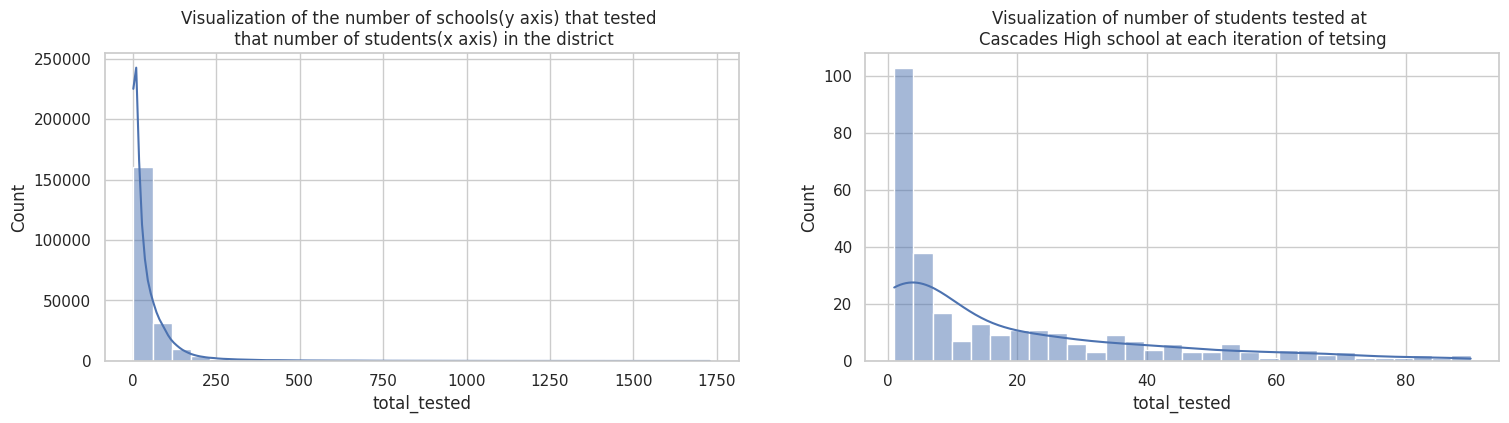

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(18, 4))
sns.histplot(df['total_tested'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Visualization of the number of schools(y axis) that tested \n that number of students(x axis) in the district')

sns.histplot(cascades_df['total_tested'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Visualization of number of students tested at \nCascades High school at each iteration of testing')

plt.show()

# Conclusion Statement

In conclusion, Cascades High School tested less kids overall at a time than most schools in the district. Additionally, the average score for students in this school is slightly higher than those of the districts.